<a href="https://colab.research.google.com/github/Raghvan-Dixit/DSA-Bootcamp-Java/blob/main/CNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d khoongweihao/covid19-xray-dataset-train-test-sets

 97% 82.0M/84.3M [00:00<00:00, 212MB/s]
100% 84.3M/84.3M [00:00<00:00, 196MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/covid19-xray.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [21]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/xray_dataset_covid19/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/xray_dataset_covid19/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)

Found 148 files belonging to 2 classes.
Found 40 files belonging to 2 classes.


In [22]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [23]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
5/5 [==============================] - 48s 9s/step - loss: 6.1908 - accuracy: 0.7230 - val_loss: 0.7993 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 38s 7s/step - loss: 2.3676 - accuracy: 0.9257 - val_loss: 0.4901 - val_accuracy: 0.6500
Epoch 3/10
5/5 [==============================] - 37s 7s/step - loss: 0.3816 - accuracy: 0.9730 - val_loss: 2.0402 - val_accuracy: 0.5000
Epoch 4/10
5/5 [==============================] - 37s 7s/step - loss: 0.3884 - accuracy: 0.9662 - val_loss: 3.7866 - val_accuracy: 0.5000
Epoch 5/10
5/5 [==============================] - 36s 7s/step - loss: 0.5167 - accuracy: 0.9797 - val_loss: 6.7926 - val_accuracy: 0.5000
Epoch 6/10
5/5 [==============================] - 38s 7s/step - loss: 0.0734 - accuracy: 0.9865 - val_loss: 9.7793 - val_accuracy: 0.5000
Epoch 7/10
5/5 [==============================] - 38s 7s/step - loss: 1.7373e-07 - accuracy: 1.0000 - val_loss: 12.6672 - val_accuracy: 0.5000
Epoch 8/10
5/5 [=============

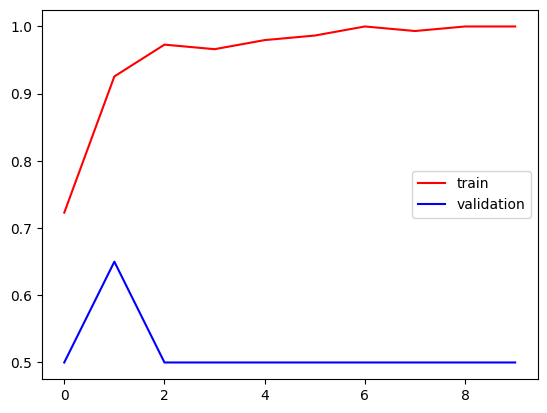

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


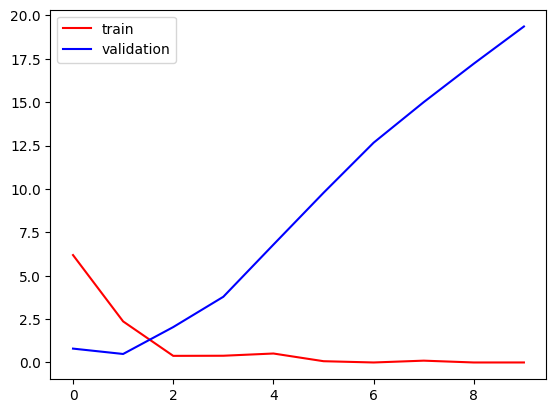

In [29]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [42]:
import cv2

In [56]:
test_img = cv2.imread('/content/pneumonia.jpeg')

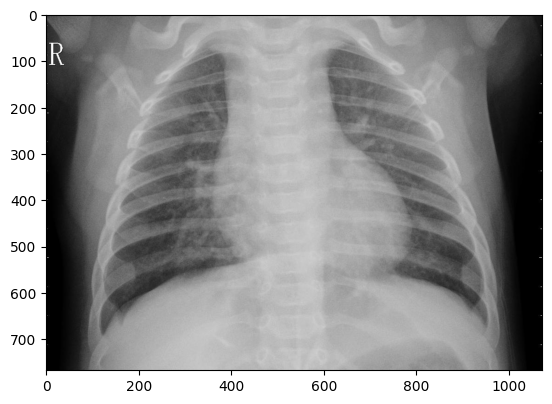

In [57]:
plt.imshow(test_img)

In [58]:
test_img.shape

(768, 1072, 3)

In [59]:
test_img = cv2.resize(test_img,(256,256))

In [60]:
test_input = test_img.reshape((1,256,256,3))

In [61]:
model.predict(test_input)

1/1 [==============================] - 0s 71ms/step


array([[0.]], dtype=float32)